<a href="https://colab.research.google.com/github/JakeOh/202505_BD50/blob/main/lab_da/ml08_classsification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification(분류)

*   Fish 데이터셋에서 Bream/Smelt 분류 문제

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# 데이터셋

In [2]:
file_path = 'https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/fish.csv'

In [3]:
fish = pd.read_csv(file_path)

In [4]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [5]:
df = fish[fish.Species.isin(['Bream', 'Smelt'])]

In [7]:
np.unique(df.Species, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([35, 14]))

In [8]:
X = df.iloc[:, 1:].values  # 특성 배열
y = df.Species.values  # 타겟 배열

In [9]:
X[:5, :]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [10]:
y[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [11]:
X[-5:, :]

array([[12.2   , 12.2   , 13.4   ,  2.0904,  1.3936],
       [13.4   , 12.4   , 13.5   ,  2.43  ,  1.269 ],
       [12.2   , 13.    , 13.8   ,  2.277 ,  1.2558],
       [19.7   , 14.3   , 15.2   ,  2.8728,  2.0672],
       [19.9   , 15.    , 16.2   ,  2.9322,  1.8792]])

In [12]:
y[-5:]

array(['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'], dtype=object)

# 훈련 셋/테스트 셋 나누기

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

In [14]:
X_train.shape  #> (samples, features)

(36, 5)

In [15]:
X_test.shape

(13, 5)

In [17]:
y_train.shape  #> (samples,)

(36,)

In [18]:
y_test.shape

(13,)

In [19]:
np.unique(y_train, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([26, 10]))

In [20]:
np.unique(y_test, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([9, 4]))

# KNN Classifier

In [23]:
knn_pipe = Pipeline(steps=[('scaler', StandardScaler()),
                           ('clf', KNeighborsClassifier())])

In [24]:
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])

In [25]:
# 훈련 셋에서의 예측값
train_pred = knn_pipe.predict(X_train)

In [32]:
train_pred.shape

(36,)

In [26]:
train_pred[:5]

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Smelt'], dtype=object)

In [27]:
y_train[:5]  # 실젯값(실제 레이블)

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Smelt'], dtype=object)

In [29]:
confusion_matrix(y_train, train_pred)

array([[26,  0],
       [ 0, 10]])

In [30]:
# 훈련 셋에서의 예측 확률
train_pred_prob = knn_pipe.predict_proba(X_train)

In [33]:
train_pred_prob.shape  #> (samples, classes)

(36, 2)

In [31]:
train_pred_prob[:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [34]:
# 테스트 셋에서의 예측 확률
test_pred_prob = knn_pipe.predict_proba(X_test)

In [35]:
test_pred_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [36]:
# 테스트 셋에서의 예측값
test_pred = knn_pipe.predict(X_test)

In [37]:
confusion_matrix(y_test, test_pred)

array([[9, 0],
       [0, 4]])

# LogisticRegression

In [38]:
log_reg = Pipeline(steps=[('scaler', StandardScaler()),
                          ('clf', LogisticRegression(random_state=42))])

In [39]:
log_reg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', LogisticRegression(random_state=42))])

In [40]:
# 훈련 셋에서의 각 클래스(Bream/Smelt)의 예측 확률
train_pred_prob = log_reg.predict_proba(X_train)

In [41]:
train_pred_prob[:5, :]

array([[0.99729033, 0.00270967],
       [0.95896655, 0.04103345],
       [0.04270989, 0.95729011],
       [0.98408167, 0.01591833],
       [0.04237554, 0.95762446]])

In [42]:
# 훈련 셋에서의 예측값
train_pred =log_reg.predict(X_train)

In [43]:
confusion_matrix(y_train, train_pred)

array([[26,  0],
       [ 0, 10]])

In [44]:
# 테스트 셋에서의 각 클래스의 예측 확률
test_pred_prob = log_reg.predict_proba(X_test)

In [45]:
test_pred_prob[:5, :]

array([[9.97327377e-01, 2.67262321e-03],
       [9.94421467e-01, 5.57853296e-03],
       [9.99430914e-01, 5.69085665e-04],
       [1.02243774e-01, 8.97756226e-01],
       [5.42736495e-02, 9.45726351e-01]])

In [46]:
# 테스트 셋에서의 예측값
test_pred = log_reg.predict(X_test)

In [47]:
confusion_matrix(y_test, test_pred)

array([[9, 0],
       [0, 4]])

# Sigmoid(Logistic) 함수

$$
\phi(z) = \dfrac{e^z}{e^z + 1} = \dfrac{1}{1 + e^{-z}}
$$

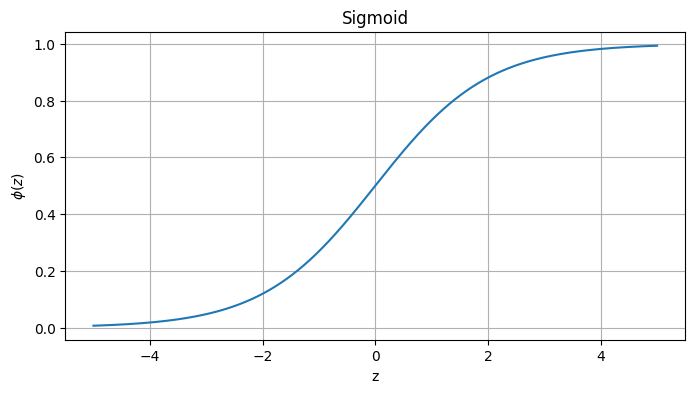

In [52]:
z = np.arange(-5, 5, 0.0001)    # x 좌표들
sigmoid = 1 / (1 + np.exp(-z))  # y 좌표들

plt.figure(figsize=(8, 4))
plt.plot(z, sigmoid)
plt.grid()
plt.xlabel('z')
plt.ylabel('$\phi(z)$')
plt.title('Sigmoid')
plt.show()

__Logistic Regression__

*   선형 회귀
$$
z_i = w_0 + x_{i1} \cdot w_1 + x_{i2} \cdot w_2 + \cdots = w_0 + \sum_j x_{ij} \cdot w_j
$$

*   선형 회귀 공식으로 계산된 결과를 logistic 함수의 argument로 전달
$$
p_i = \phi(z_i) = \dfrac{1}{1 + e^{-z}}
    = \dfrac{1}{1 + exp(-(w_0 + \sum_j x_{ij} \cdot w_j))}
$$

*   logistic 함수의 리턴값은 항상 0 ~ 1이므로, Logistic Regression은 logistic 함수의 리턴값을 양성이 될 확률로 해석.
*   Logistic Regression에서 훈련(학습)이란 훈련 데이터로부터 아래의 비용 함수를 최소화하는 파라미터들($w_0$, $w_1$, ...)을 찾는 과정.


__비용(손실) 함수(cost/loss function)__

*   이진 분류에서는 손실 함수 log loss가 최소가 되는 계수들을 찾는 것이 목적.
*   Logistic loss function(__log loss__)

>>   $ L = -[y \log{p} + (1-y) \log{(1-p)}] $

>>   $ J(W) = - \dfrac{1}{N} \sum_{i=1}^{N} [y^{(i)} \log({p}^{(i)}) + (1-y^{(i)}) \log(1 - {p}^{(i)})] $

>>   N: the number of samples

*   다중 클래스 분류에서는 비용 함수 크로스 엔트로피가 최소가 되는 계수들을 찾는 것이 목적.
*   __Cross entropy__ cost function

>>   $ J(W) = - \dfrac{1}{N} \sum_{i=1}^{N} \sum_{k=1}^{m} y_{k}^{(i)} \log({p}_{k}^{(i)}) $

>>   N: the number of samples

>>   m: the number of classes